In [60]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

input_file='./speech.wav'
fs, data = wavfile.read(input_file)

if len(data.shape) > 1:	
	print("Channels:", data.shape[1])
	data = np.mean(data, axis=1) # Merge channels

cutoff = 1000
filter_type='lowpass'

length = data.shape[0] / fs

print(f"Length: {length}s")

Length: 3.504s


Text(0.5, 0, 'Time (sec)')

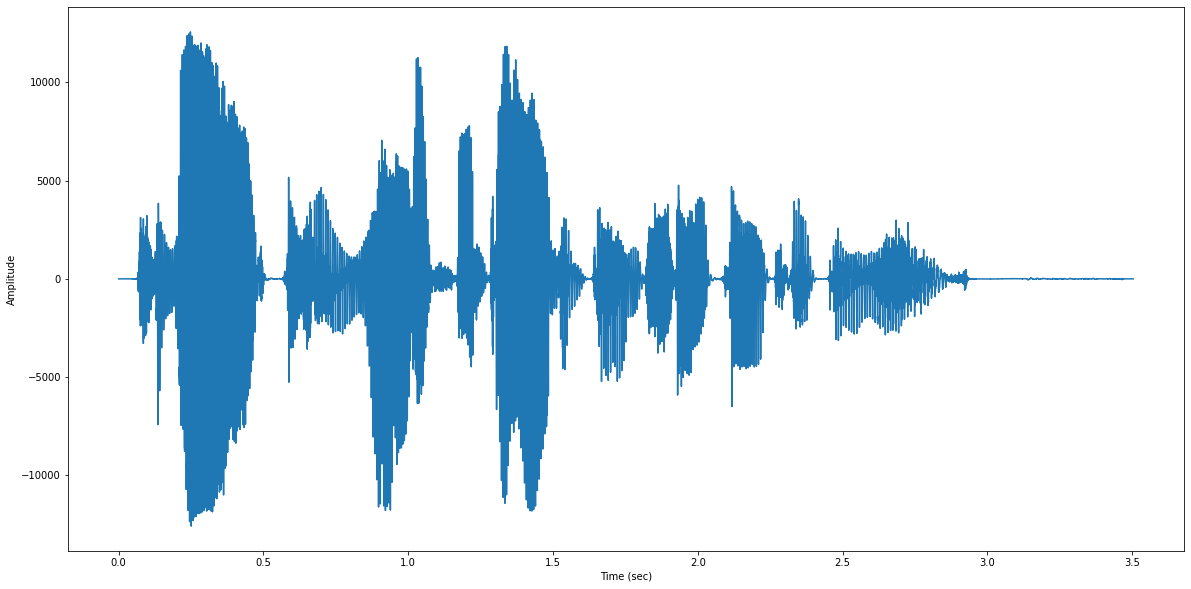

In [61]:
# Plot the audio signal in time domain
time = np.linspace(0., length, data.shape[0])

plt.figure(figsize=(20, 10))
plt.plot(time, data)

plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")

Text(0.5, 0, 'Frequency (Hz)')

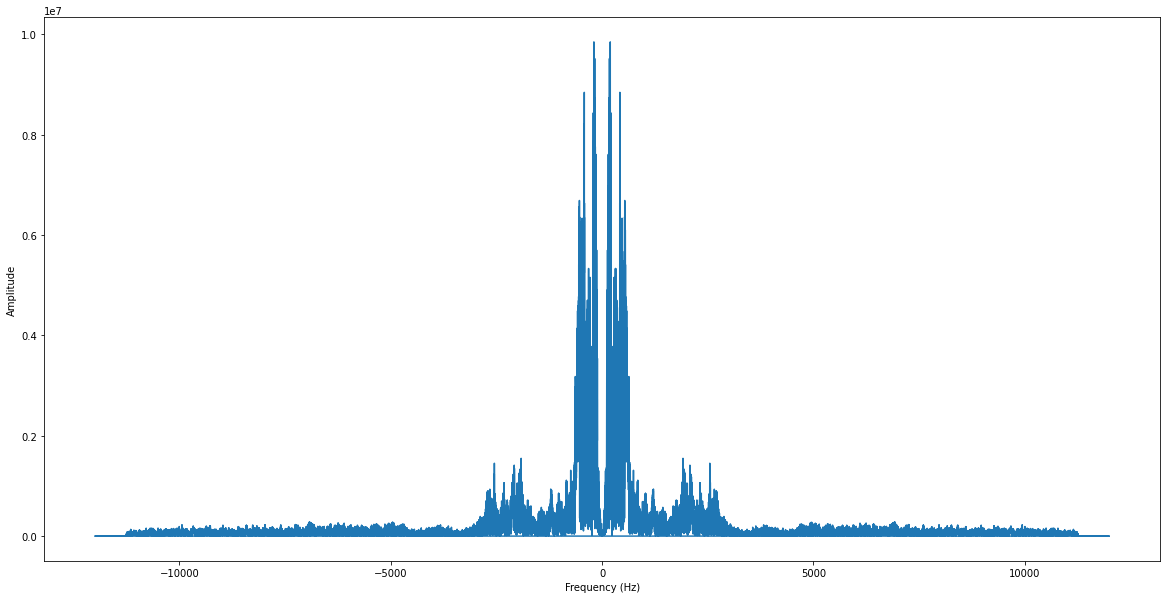

In [62]:
# - Find the frequency domain representation of the signal and plot it
transformed_signal = np.fft.fft(data)

freqs= np.fft.fftfreq(len(transformed_signal), 1/fs)

plt.figure(figsize=(20, 10))
plt.plot(freqs, np.abs(transformed_signal))

plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

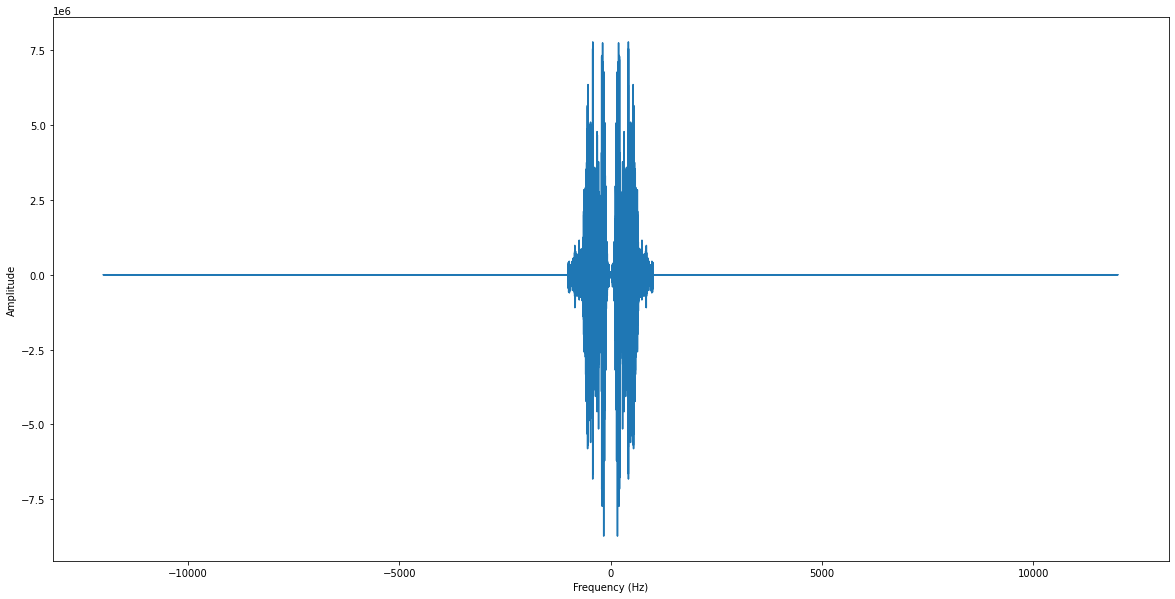

In [66]:
def filter(signal, filter_type="lowpass"):
	filter_mask = np.ones_like(signal)

	if filter_type == "lowpass":
		filter_mask[np.abs(np.fft.fftfreq(len(signal)) * fs) > cutoff] = 0
		return signal * filter_mask
	elif filter_type == "highpass":
		filter_mask[np.abs(np.fft.fftfreq(len(signal)) * fs) < cutoff] = 0
		return signal * filter_mask

filtered_spectrum =	filter(transformed_signal, filter_type) 

plt.figure(figsize=(20, 10))
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.plot(freqs, filtered_spectrum)

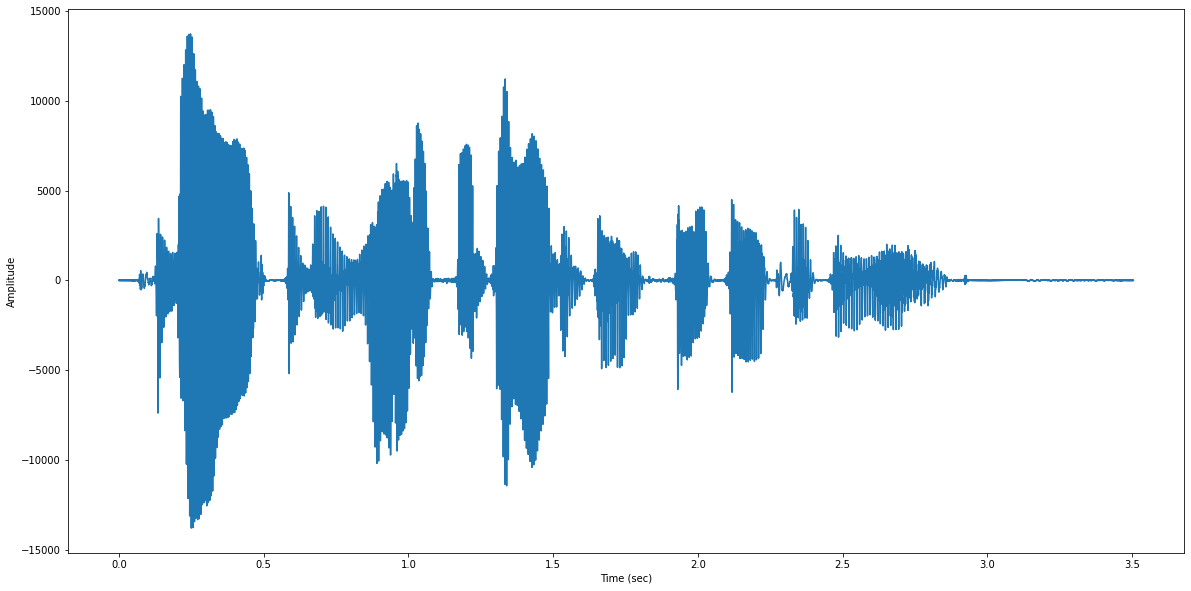

In [68]:
# - Find the corresponding signal in time domain for the filtered signal and plot it
output_signal = np.fft.ifft(filtered_spectrum)
plt.figure(figsize=(20, 10))
plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")
plt.plot(time, output_signal)

In [65]:
# Save the output file
wavfile.write('./output.wav', fs, output_signal.astype(np.int16))

/tmp/ipykernel_532187/1816435379.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write('./output.wav', fs, output_signal.astype(np.int16))
